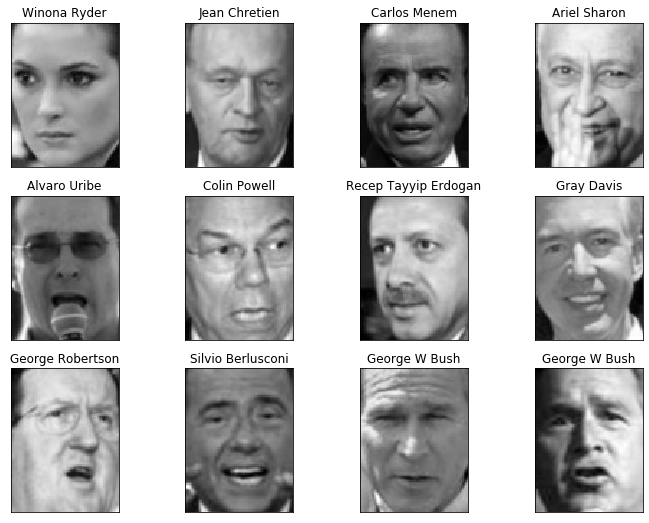

In [24]:
import matplotlib.pyplot as plt
#导人数据集获取工具
from sklearn.datasets import fetch_lfw_people#人脸识别的数据集
#载入人脸数据集
faces= fetch_lfw_people(min_faces_per_person=20, resize=0.8)
image_shape=faces.images[0].shape
#将照片打印出来
fig,axes= plt.subplots(3,4,figsize=(12 , 9),
subplot_kw={'xticks':(),'yticks':()})
for target , image , ax in zip(faces.target,faces.images,axes.ravel()):
    
    ax.imshow(image,cmap=plt.cm.gray)
    ax.set_title(faces.target_names[target])
#显示图像
plt.show ()

In [26]:
#导人神经网络
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
#对数据集进行拆分
X_train,X_test,y_train,y_test= train_test_split(faces.data/255 ,
faces.target,
random_state=62)
#训练神经网络
mlp=MLPClassifier(hidden_layer_sizes=[100 , 100], random_state=62 ,
max_iter=400)
mlp.fit(X_train , y_train)
#打印模型准确率
print("模型识别准确率：{:.2f}".format(mlp.score(X_test, y_test)))

模型识别准确率：0.56


那么什么是数据白化呢？ 拿我们这个例子来说，虽然每个人的面部特征有很大差异，
但如果你从像素级别观察， 差距其实就没有那么大了。而且相邻的像素之间有很大的相
关性，这样一来，样本特征的输入就是冗余的了，白化的目的就是为了要降低冗余性。
所以白化的过程会让样本特征之间的相关度降低，且所有特征具有相同的方差。

In [28]:
#使用自化功能处理人脸数据
from sklearn.decomposition import PCA
pca = PCA(whiten=True,n_components=0.9,random_state=62).fit(X_train)#先train
X_train_whiten = pca.transform(X_train)
X_test_whiten = pca.transform(X_test)
#打印自化后数据形态
print ("自化后数据形态门{}". format(X_train_whiten.shape))

自化后数据形态门(2267, 105)


In [29]:
mlp.fit(X_train_whiten, y_train)
#打印模型准确率
print(mlp.score(X_test_whiten,y_test))

0.5714285714285714


有特征提取的话就是效果会好一些，用whiten来将多余的数据白化，这样的话就起到特征提取的效果

NMF也是一个无监督学习，它是非负矩阵的分解，也可以用来进行特征提取

但是,原来的矩阵里的所有元素必须都是非负的才可以

与PCA 不同的是，如果我们降低NMF 的成分数量， 它会重新生成新的成分，而新
的成分和原来的成分是完全不一样的。另外， NMF 中的成分是没有顺序的，这点和PCA
也有所不同。

In [31]:
#导入NMF
from sklearn.decomposition import NMF
#使用NMF处理数据
nmf = NMF(n_components=105,random_state=62).fit(X_train)#nmf的Component不能设置为浮点数，只能为整数
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

In [32]:
mlp.fit(X_train_nmf,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[100, 100], learning_rate='constant',
              learning_rate_init=0.001, max_iter=400, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=62, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [33]:
mlp.score(X_test_nmf,y_test)

0.5555555555555556